# Homework 7 Assignment 1
# By Yukun Wan (yw3447)

# IDEA

### People prefer to ride bike for short distance, which is less than 15 minutes**

# Null hypothesis 
### H0: The fraction of >15min trips over total number of trips on weekdays is more or the same as the fraction of <15min trips over total number of trips on weekdays.
### H0: Tlong >= Tshort

# Alternative hypothesis 
### H1: The fraction of >15min trips over total number of trips on weekdays is less than the fraction of <15min trips over total number of trips on weekdays.
### H1: Tlong < Tshort

# The significance level is 0.05


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import sys
import os
from evalChisq import evalChisq

%pylab inline

os.getenv('PUIDATA')


Populating the interactive namespace from numpy and matplotlib


'/Users/wanyukun/PUIdata'

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201612'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['Start Time'])

df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,2016-12-01 00:00:04
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,2016-12-01 00:00:28
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,2016-12-01 00:00:39
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,2016-12-01 00:00:44
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,2016-12-01 00:00:54


In [5]:
df.keys()

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender', u'date'],
      dtype='object')

In [6]:
df.drop([u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'], axis=1,inplace=True)

In [7]:
df.describe()

,Trip Duration
count,8.121920e+05
mean,7.759573e+02
std,7.542199e+03
min,6.100000e+01
25%,3.340000e+02
50%,5.330000e+02
75%,8.760000e+02
max,3.473103e+06


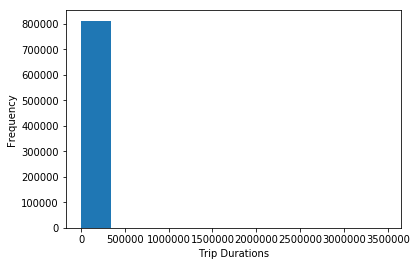

In [8]:
pl.hist(df['Trip Duration'])
pl.xlabel('Trip Durations')
pl.ylabel('Frequency')
pl.show()

**Figure 1:** Frequency of Trip durations in December 2016 before removing outliers.

In [9]:
# Remove outlier
df = df[(df['Trip Duration'] < df['Trip Duration'].mean() + 3 * df['Trip Duration'].std()) & \
  (df['Trip Duration'] > df['Trip Duration'].mean() - 3 * df['Trip Duration'].std())]

In [10]:
df.describe()

,Trip Duration
count,811697.000000
mean,699.729096
std,664.394607
min,61.000000
25%,334.000000
50%,533.000000
75%,875.000000
max,23381.000000


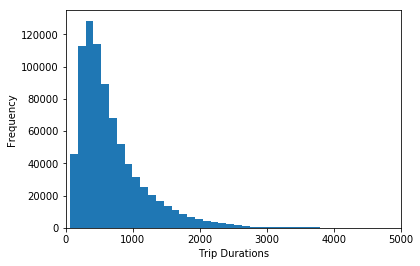

In [11]:
pl.hist(df['Trip Duration'],bins=200)
pl.xlim(0,5000)
pl.xlabel('Trip Durations')
pl.ylabel('Frequency')
pl.show()

**Figure 2:** Frequency of Trip durations in December 2016 after removing outliers with 3-sigma rules.

# Lets separate trips more than 15 minutes (Long trip) from trips equal or less than 15 trips (Short trip) to test the hypotheses.
# In this csv file Trip Duration > 900 is long trip, Trip Duration <= 900 is short trip
# Lets plot the number of trips per week day

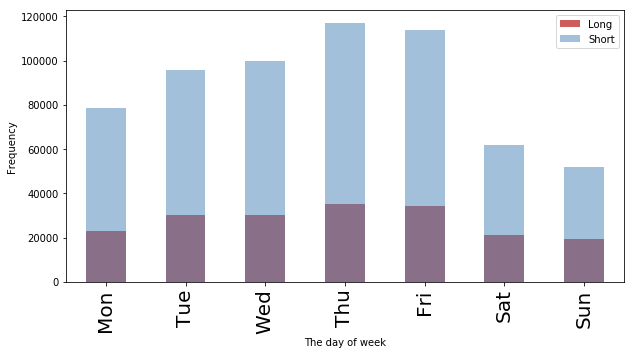

In [12]:
fig = pl.figure(figsize(10,5))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_long = 1
ax = ((df['date'][df['Trip Duration'] > 900].groupby([df['date'].dt.weekday]).count()) / norm_long).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Long')

norm_short = 1
ax = ((df['date'][df['Trip Duration'] <= 900].groupby([df['date'].dt.weekday]).count()) / norm_short).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Short')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel('Frequency')
ax.set_xlabel('The day of week')
pl.legend()

### Figure 1: Distribution of Citibike bikers by ride time in December 2016, absolute counts

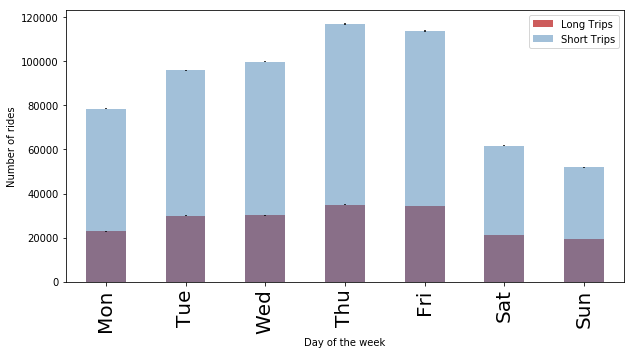

In [13]:
fig=pl.figure(figsize(10,5))

counts_long = df.date[df['Trip Duration'] > 900].groupby([df.date.dt.weekday]).count()
norm_long = 1
error_long = np.sqrt(counts_long)
ax=((counts_long) / norm_long).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_long) / norm_long, (error_long) / norm_long)], label='Long Trips')


counts_short = df.date[df['Trip Duration'] <= 900].groupby([df.date.dt.weekday]).count()
norm_short = 1
error_short =np.sqrt(counts_short)
ax = ((counts_short) / norm_short).plot(kind="bar", color='SteelBlue', alpha=0.5, yerr=[
            ((error_short) / norm_short, (error_short) / norm_short)], label='Short Trips')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend()

### Figure 2: Distribution of Citibike bikers by ride time in December 2016, absolute counts, with statistical errors

## Analysis

In [14]:
df.head()

,Trip Duration,date
0,528,2016-12-01 00:00:04
1,218,2016-12-01 00:00:28
2,399,2016-12-01 00:00:39
3,254,2016-12-01 00:00:44
4,1805,2016-12-01 00:00:54


In [15]:
norm_week = sum(counts_long[:-2]) + sum(counts_short[:-2])
norm_weekend = sum(counts_long[-2:]) + sum(counts_short[-2:])

In [16]:
week_long = sum(counts_long[:-2]) * 1.0 / norm_week  #fraction of long riding on week days
week_short = sum(counts_short[:-2]) * 1.0 / norm_week
weekend_long = sum(counts_long[-2:]) * 1.0 / norm_weekend  #fraction of long riding on weekends
weekend_short = sum(counts_short[-2:]) * 1.0 / norm_weekend

eweek_long = np.sqrt(sum(error_long[:-2]**2)) / norm_week  #error on fraction number of long riding on week days
eweek_short = np.sqrt(sum(error_short[:-2]**2)) / norm_week
eweekend_long = np.sqrt(sum(error_long[-2:]**2)) / norm_weekend #error on fraction number of long riding on weekends
eweekend_short = np.sqrt(sum(error_short[-2:]**2)) / norm_weekend

In [17]:
print("Long: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_long, weekend_long, eweek_long, eweekend_long))
print("Short: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_short, weekend_short, eweek_short, eweekend_short))

Long: week:0.232, weekend:0.264, weekend error:0.001, weekend error:0.001
Short: week:0.768, weekend:0.736, weekend error:0.001, weekend error:0.002


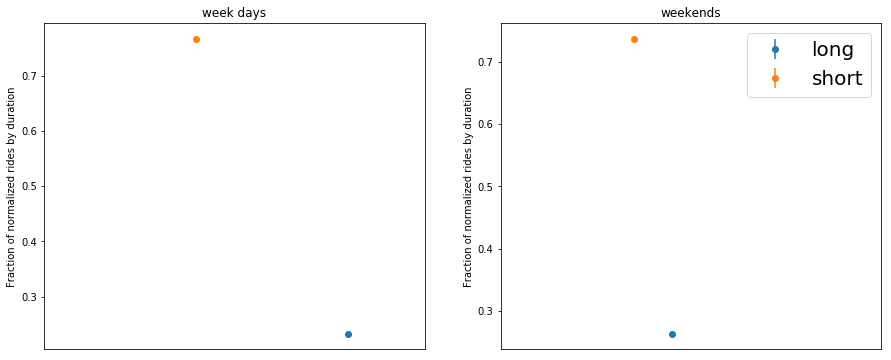

In [18]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [week_long], yerr=[eweek_long], fmt='o', label='long')
ax1.errorbar([0.2], [week_short], yerr=[eweek_short], fmt='o', label='short')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_long], yerr=[eweekend_long], fmt='o', label='long')
ax2.errorbar([0.2], [weekend_short], yerr=[eweekend_short], fmt='o', label='short')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by duration")
ax1.set_ylabel("Fraction of normalized rides by duration")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

**Figure 3:** Fraction of Citibike trips based on long/short durations in December 2016 for week days (left) and weekends (right)

### Use chi-square test to analyze

Is the fraction of long trips(>15min) over total number of trips on weekdays more or equal to that of short trips(<=15min)?


In [19]:
week_short, week_long, norm_week, weekend_short, weekend_long, norm_weekend

(0.76803399790328009,
 0.23196600209671997,
 657217,
 0.73613412739513207,
 0.26386587260486793,
 154480)

** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 
CONTINGENCY TABLE:

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|long trips in weekdays  |     long trips          | short trips     |                   
|---------------------------|:-------------------------:|----------------------|---------------------------|
| test sample (weekdays)    | $0.2324*657551$           | $0.7676*657551$      | 657551               |
| control sample (weekends) | $0.2646*154641$           | $0.7354*154641$     | 154641                |
|                           |                       |                  |                           |
| total                     | 193709.0               |  618483.0         | 812192                       |

In [20]:
sample_values = np.array([[0.2324 * 657551, 0.7676 * 657551], [0.2646 * 154641, 0.7354 * 154641]])

print (evalChisq(sample_values))

714.677713469


Because Degree of freedom here is 1 and we set significance level to 0.05, then we can find the critical Probability in table is 3.84

chi-square statistic 714 > critical value 3.84

It means that Null Hypothesis is rejected.